In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
import pickle
from xgboost import XGBClassifier


df = pd.read_csv("data_C.csv")
df.head(5)

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


Kolom Unnamed:0 , ID,CustomerID,Surname akan dibuang karena untuk prediksi hal tersebut tidak objektif berpengaruh

In [94]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['Unnamed: 0', 'id', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)


In [95]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


Cek Outlier

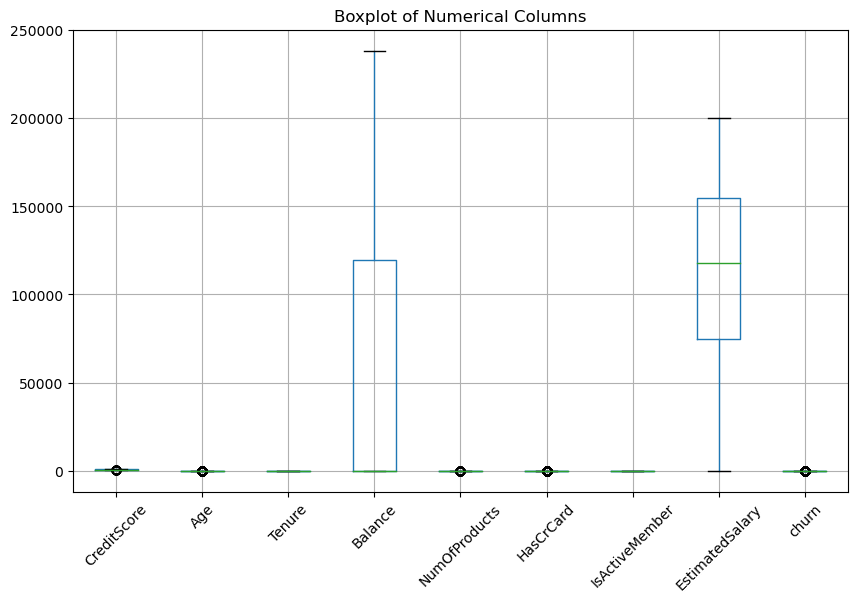

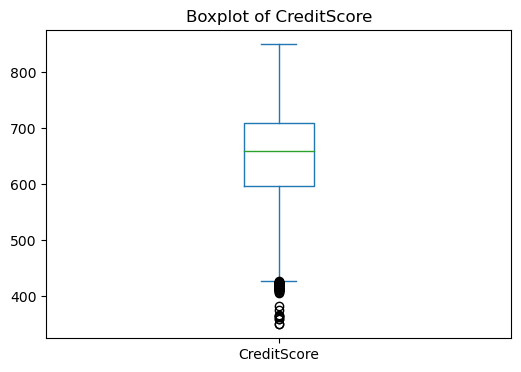

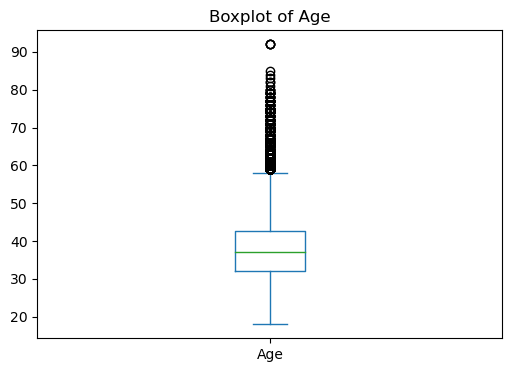

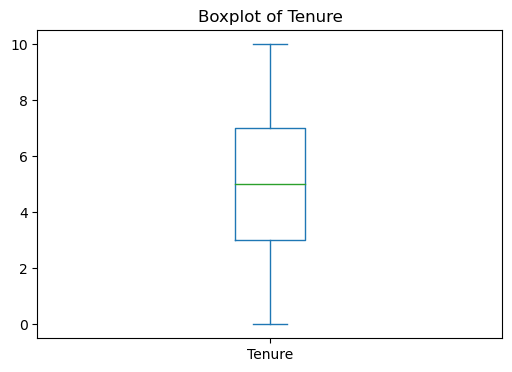

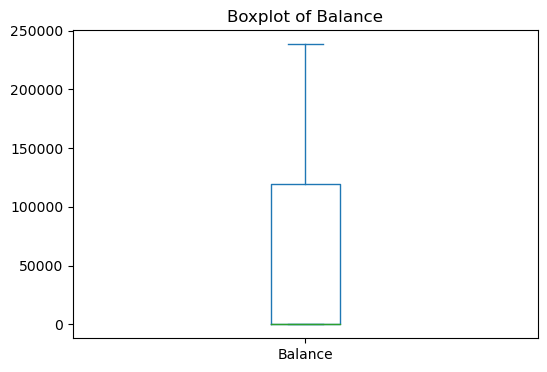

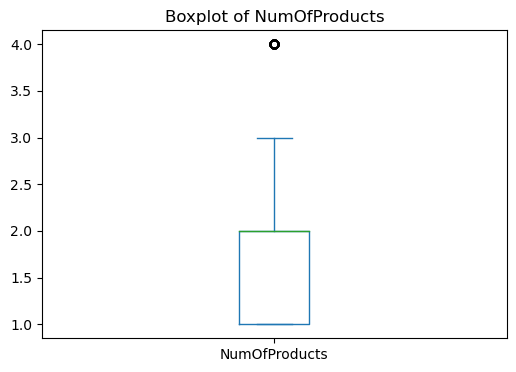

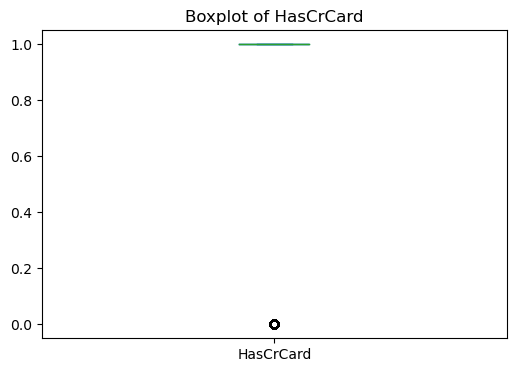

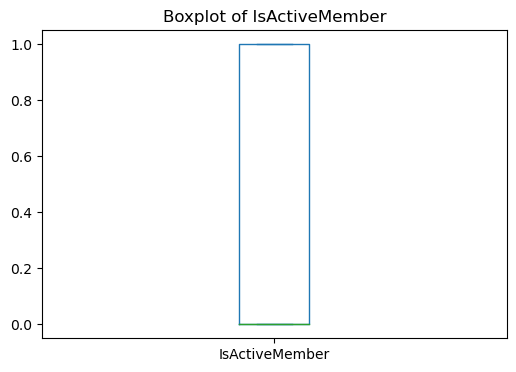

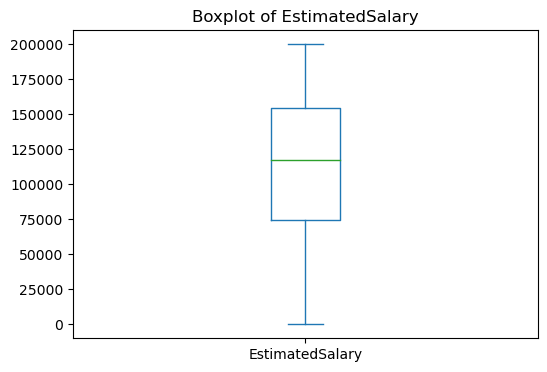

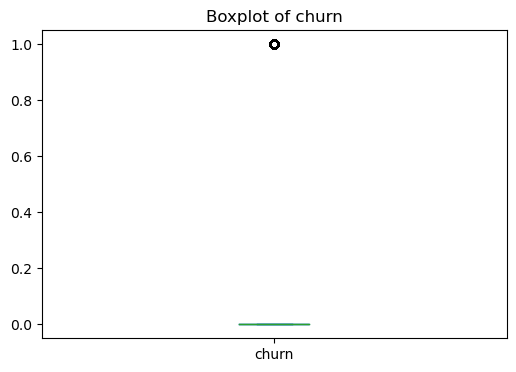

In [96]:
# Membuat boxplot untuk semua kolom numerik dalam DataFrame
df.boxplot(figsize=(10, 6))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Hanya melihat kolom numerik
        # Membuat boxplot untuk kolom tertentu
        df[column].plot(kind='box', figsize=(6, 4))
        plt.title(f'Boxplot of {column}')
        plt.show()

In [97]:
# Loop melalui setiap kolom dalam DataFrame
for column in df.columns:
    print(f"Unique values count in column '{column}':")
    print(df[column].value_counts())
    print()  # Untuk membuat baris kosong antara setiap keluaran


Unique values count in column 'CreditScore':
CreditScore
850.0    594
678.0    561
684.0    459
667.0    408
683.0    395
        ... 
424.0      1
475.0      1
441.0      1
367.0      1
427.0      1
Name: count, Length: 444, dtype: int64

Unique values count in column 'Geography':
Geography
France     23469
Spain       9057
Germany     8732
Name: count, dtype: int64

Unique values count in column 'Gender':
Gender
Male      23219
Female    18039
Name: count, dtype: int64

Unique values count in column 'Age':
Age
37.00    2351
38.00    2317
35.00    2241
34.00    2148
36.00    2135
         ... 
83.00       1
84.00       1
85.00       1
36.44       1
81.00       1
Name: count, Length: 71, dtype: int64

Unique values count in column 'Tenure':
Tenure
7     4516
2     4469
8     4424
5     4297
4     4253
9     4240
1     4177
3     4114
6     3960
10    1491
0     1317
Name: count, dtype: int64

Unique values count in column 'Balance':
Balance
0.00         22471
124577.33       26
129855.

In [98]:
# Loop melintasi setiap kolom dalam DataFrame
for column in df.columns:
    # Hanya memproses kolom numerik
    if df[column].dtype in ['int64', 'float64']:
        print(f"Summary statistics for column '{column}':")
        print(df[column].describe())
        print()  # Baris kosong

        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print()  # Baris kosong


Summary statistics for column 'CreditScore':
count    41246.000000
mean       655.802890
std         79.736298
min        350.000000
25%        597.000000
50%        659.000000
75%        710.000000
max        850.000000
Name: CreditScore, dtype: float64

Value counts for column 'CreditScore':
CreditScore
850.0    594
678.0    561
684.0    459
667.0    408
683.0    395
        ... 
424.0      1
475.0      1
441.0      1
367.0      1
427.0      1
Name: count, Length: 444, dtype: int64

Summary statistics for column 'Age':
count    41258.000000
mean        38.165611
std          8.947665
min         18.000000
25%         32.000000
50%         37.000000
75%         42.750000
max         92.000000
Name: Age, dtype: float64

Value counts for column 'Age':
Age
37.00    2351
38.00    2317
35.00    2241
34.00    2148
36.00    2135
         ... 
83.00       1
84.00       1
85.00       1
36.44       1
81.00       1
Name: count, Length: 71, dtype: int64

Summary statistics for column 'Tenure':
co

Dari sini kita bisa melihat dan memastikan bahwa data tidak ada yang outlier atau valuenya tidak wajar. Waktunya mengecek missing value

In [99]:
df.isna().sum()

CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

karena jumlah data dibanding yang missing value sangat berbanding terbalik, maka saya akan drop data yang memiliki missing value

In [100]:
df.dropna(inplace=True)
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Memisahkan data numerical dan categorical 

In [101]:
numeric = df.select_dtypes(['float64', 'int64']).columns
categorical = df.drop(numeric, axis=1).columns

In [102]:
df[categorical].head(5)

,Geography,Gender
0,Spain,Female
1,Spain,Male
2,France,Female
3,Spain,Male
4,Spain,Male


In [103]:
df[numeric].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,23.0,5,0.00,2,1,0,134483.07,0


Karena kita ingin memprediksi churn maka kita akan drop churn dan coba dengan oneHotEncoder

In [104]:
# Pisahkan fitur dan target
X = df.drop(['churn'], axis=1)
y = df['churn']

# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi OneHotEncoder dengan parameter yang sama untuk semua kolom kategorikal
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Transformasi kolom-kolom kategorikal untuk set pelatihan dan pengujian
for col in categorical:
    encoded_train = encoder.fit_transform(x_train[[col]])
    encoded_test = encoder.transform(x_test[[col]])

    # Simpan nama kolom yang akan dihapus
    columns_to_drop = [col]

    # Reset indeks sebelum penggabungan
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)

    # Gabungkan hasil transformasi dengan DataFrame asli
    x_train = pd.concat([x_train.drop(columns=columns_to_drop), 
                         pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(columns_to_drop))], 
                        axis=1)
    x_test = pd.concat([x_test.drop(columns=columns_to_drop), 
                        pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(columns_to_drop))], 
                       axis=1)

# Cetak bentuk dari data latih dan data uji
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of testing data:")
print(x_test.shape)
print(y_test.shape)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()


Shape of training data:
(32996, 13)
(32996,)
Shape of testing data:
(8250, 13)
(8250,)


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Menggunakan MinMaxScaller

In [105]:
continous = ['Age','Balance','CreditScore', 'EstimatedSalary']

# Menggunakan MinMaxScaler untuk mengubah fitur-fitur kontinu menjadi rentang [0, 1]
scaler = MinMaxScaler()
x_train_scaled[continous] = scaler.fit_transform(x_train_scaled[continous])
x_test_scaled[continous] = scaler.transform(x_test_scaled[continous])

def model_comparison(X_train, X_test, y_train, y_test, **model_kwargs):
    # Initialize models with additional kwargs
    models = {
        'Random Forest': RandomForestClassifier(**model_kwargs.get('RandomForest', {})),
        'XGBoost': XGBClassifier(**model_kwargs.get('XGBoost', {}))
    }

    # Train and evaluate each model
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Menambahkan hasil ke dictionary
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        
        # Menampilkan classification report untuk setiap model
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

    # Membuat DataFrame untuk hasil
    results_df = pd.DataFrame(results)

    return results_df

model_kwargs = {
  'RandomForest': {'n_estimators': 128, 'max_depth': 128, 'random_state': 42},
  'XGBoost': {'n_estimators': 128, 'max_depth': 128}
}
# Menggunakan fungsi model_comparison untuk membandingkan kinerja model
model_results = model_comparison(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled,
                                 RandomForest=model_kwargs['RandomForest'], 
                                 XGBoost=model_kwargs['XGBoost'])

print("Model Evaluation Results:")
print(model_results)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6458
           1       0.73      0.54      0.62      1792

    accuracy                           0.86      8250
   macro avg       0.81      0.74      0.77      8250
weighted avg       0.85      0.86      0.85      8250

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6458
           1       0.69      0.55      0.61      1792

    accuracy                           0.85      8250
   macro avg       0.78      0.74      0.76      8250
weighted avg       0.84      0.85      0.84      8250

Model Evaluation Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.857333   0.848886  0.857333  0.849135
1        XGBoost  0.847758   0.839371  0.847758  0.841446


In [106]:
# Membandingkan kinerja model dengan data yang belum diolah
results_encode_clean = model_comparison(x_train, x_test, y_train, y_test, **model_kwargs)

# Menampilkan hasil evaluasi model dengan data yang belum diolah
print("Model Evaluation with OHE")
print("\n")
print(results_encode_clean)

results_encode_scaled_clean = model_comparison(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, **model_kwargs)
print("Model Evaluation with OHE and MinMaxScaler")
print("\n",results_encode_scaled_clean)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6458
           1       0.73      0.55      0.63      1792

    accuracy                           0.86      8250
   macro avg       0.81      0.75      0.77      8250
weighted avg       0.85      0.86      0.85      8250

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6458
           1       0.68      0.54      0.61      1792

    accuracy                           0.85      8250
   macro avg       0.78      0.74      0.75      8250
weighted avg       0.84      0.85      0.84      8250

Model Evaluation with OHE


           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.858061   0.849768  0.858061  0.850114
1        XGBoost  0.845697   0.837028  0.845697  0.839195
Classification Report for Random Forest:
              precision    

In [107]:
model_kwargs2 = {
  'RandomForest': {
    'n_estimators': 128, 
    'max_depth': 128,      
    'random_state': 42,   
    'min_samples_split': 2, 
    'min_samples_leaf': 5, 
  },
  'XGBoost': {
    'n_estimators': 128, 
    'max_depth': 128,       
    'learning_rate': 0.1,
    'gamma': 0.4,      
    'colsample_bytree': 0.8, 
  }
}

results_encode_scaled_clean = model_comparison(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, **model_kwargs2)
print("Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:")
print(results_encode_scaled_clean)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6458
           1       0.75      0.53      0.62      1792

    accuracy                           0.86      8250
   macro avg       0.82      0.74      0.77      8250
weighted avg       0.85      0.86      0.85      8250

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6458
           1       0.73      0.53      0.61      1792

    accuracy                           0.85      8250
   macro avg       0.80      0.74      0.76      8250
weighted avg       0.85      0.85      0.85      8250

Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.859515   0.851270  0.859515  0.850072
1        XGBoost  0.854545   0.845625  0.854545  0.845905


In [108]:
# Path to export the trained model
export_path = r"\UTS"

# Inisialisasi dan pelatihan model XGBoost
model = XGBClassifier(
    n_estimators=128,
    max_depth=128,
    learning_rate=0.1,
    gamma=0.4,
    colsample_bytree=0.8
)
model.fit(x_train_scaled, y_train_scaled)

# Ekspor model ke file pickle
filename = 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Memuat kembali model dari disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Evaluasi model yang dimuat
result = loaded_model.score(x_test_scaled, y_test_scaled)
print("Accuracy:", result)

# Tampilkan path di mana model XGBoost diekspor
print(f"XGBoost model trained and exported to: {export_path}")


Accuracy: 0.8545454545454545
XGBoost model trained and exported to: \UTS
